# Research assignment 3

[Carmen Salazar]

[General Social Survey 2018 Data] 

[02/26/2020]

## 1. Build your hypothesis

Write bullet points that answer the following questions:

    A. What is your depedent variable? For this assignment, your depedent should be a continuous variable. Describe how your depedent variable is measured. If your data doesn't allow this, you can use either the General Social Survey 2018 or the Grant and Loan Repayment data. 
    
    - dependent variable is respondent's income in constant dollars (realinc). This dependent variable was measured by________
    
    B. What are the indepedent variables you are most interested in? Are they interval ratio or nominal? Why?
    
    - independent variables are age, respondent's highest year of school completed (educ; interval ratio) & time at current job (yearsjob; interval ratio).

    C. What are your control variables? Are they interval ratio or nominal? Why?
    
    -control variables are father's highest year school completed (paeduc; interval ratio) &  respondent's father's socioeconomic index-2010 (PASEI10; interval ratio).

    D. What are your hyphotheses on the relationships between your dependent and independent variables (including control variables)? Make seperate hypotheses for separate independent variables and for intervening relationships that involve multiple independent variables of interest.

## 2. Prepare your data

Do the following:

    A. Set current directory

    B. Set more off

    C. Creat log file
    
    D. Load only variable from the dataset that you will use

    E. Use -describe- and -codebook- to see details of the varaibles

In [3]:

*cd "/Users/karminsalazar/Desktop/Gradstats/gradstats2/week6"

*set more off

*capture log close

*log using research_assignment_3log20200219.log

use realrinc age sex race educ yearsjob paeduc PASEI10 using GSS2018w6.dta

describe realrinc age sex race educ yearsjob paeduc PASEI10

codebook realrinc age sex race educ yearsjob paeduc PASEI10









              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
realrinc        double  %12.0g     LABIH      R's income in constant $
age             byte    %8.0g      AGE        Age of respondent
sex             byte    %8.0g      SEX        Respondents sex
race            byte    %8.0g      RACE       Race of respondent
educ            byte    %8.0g      LABK       Highest year of school completed
yearsjob        float   %9.0g      YEARSJOB   Time at current job
paeduc          byte    %8.0g      LABK       Highest year school completed, father
PASEI10         double  %12.0g     LABUS      R's father's socioeconomic index (2010)


-----------------------------------------------------------

## 3. Use scatterplots to visually assess relationships between your dependent variable and all of your independent variables

    A. Quietly generate scatterplots for the dependent variable and each independent variable (including contol variables). Then use graph combine to examine all of the scatter plots.

    B. Write a paragraph interpreting what the scatterplots show

In [19]:
foreach x of var age educ yearsjob paeduc PASEI10 {
  quietly graph twoway (scatter realrinc `x') (lfit realrinc `x', color(red)), name(`x', replace) legend(off) ytitle(Income) scheme(plotplainblind)
}

*forloop for independent variables: age, educ, yearsjob
*dependent variable: realinc
*control variables: paeduc, PASEI10


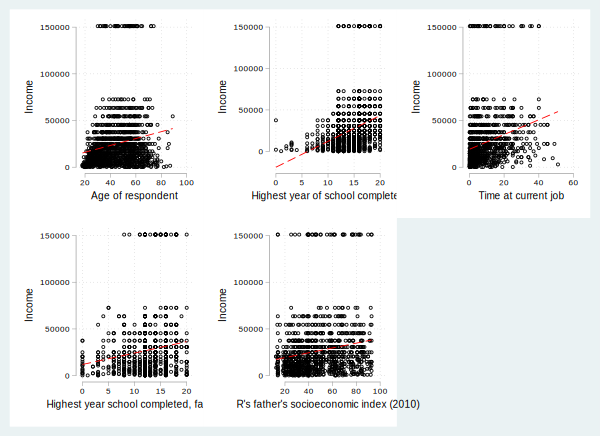

In [20]:
graph combine age educ yearsjob paeduc PASEI10, col(3) 

*we now have 5 graphs for our 5 independent & control variables 
*univariate regression with scatterplot for 5 variables

*Interpret what scatterplots show here 

## 4. Assess multicorrelation among your independent variables

    A. Create a correlation matrix for all of your variables.

    B. . Write bullet points or a short paragraph summarizing what the matrix shows.

In [21]:
correlate realrinc age educ yearsjob paeduc PASEI10

*Correlation matrix - overview of how independent and dependent variables are correlated with each other 


(obs=886)

             | realrinc      age     educ yearsjob   paeduc  PASEI10
-------------+------------------------------------------------------
    realrinc |   1.0000
         age |   0.1448   1.0000
        educ |   0.2846   0.0380   1.0000
    yearsjob |   0.2341   0.4679   0.0522   1.0000
      paeduc |   0.1786  -0.2017   0.3886  -0.0427   1.0000
     PASEI10 |   0.1714  -0.1051   0.3249   0.0327   0.5421   1.0000



*summarize what matrix shows here- for example: 

*in the correlation table below educ explains 29% of real income 
*cannot analyze sex and race this way because theyre not rank ordered categories 
*1.0000 perfectly correlated variables with each other (i.e., age with age, sex with sex, race with race)

## 5. Describe at least 2 OLS models to test your hypotheses

Write a paragraph or a set of bullet points that explain:

    A. Which model tests which of your hypotheses
    
    -bivariate Linear Regression: those which use only one feature to predict the target
    
    - Multiple Linear Regression: whenever you are facing more than one features able to explain the target variable, you are likely to employ a
    
    B. Which variables are included in each model
    
    B. How/why adding particular variables to subsequent models will test for spurious or intervening relationships

## 6. Write OLS regression equations for each model

Use subscripts to indicate which symbols represesent your different independent variables. To do so, you can copy and paste the LaTex code in this week's lesson notebook and edit the subscripts.


$\hat{realrinc} = \alpha + \beta_1 \times xeduc $

$\hat{realrinc} = \alpha + \beta_1 \cdot xeduc +  \beta_2 \cdot xpaeduc + \beta_3 \cdot xPASEI10 $



## 7. Estimate your models with stata

    A. Write Stata code to estimate the models and store the regression results
    
    B. Write code to output the estimates in a table within Jupyter Notebook in HTML (with %html magic) and as an RTF file

In [23]:
est clear

quietly eststo: reg realrinc educ
quietly eststo: reg realrinc educ paeduc PASEI10

In [24]:
%html
esttab, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2" "Model 3") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (educ "Highest year of school completed" paeduc "Highest year school completed, father" PASEI10 "R's father's socioeconomic index (2010)") html

This front-end or document format cannot display HTML

## 8. Summarize the results for your hypotheses

    A. Which of your hypotheses are supported and which are rejected by the (in)consistency of coefficients across all of your models?
    
    B. Which of your hypotheses regarding intervening or spurious relationships are supported / rejected by similarities / differences in coefficients across all of your models?

    C. What ideas do you have for why any of your hypotheses were rejected? Are there additional omitted variables do you think you should include to test your hypotheses that might change your results? Why?